In [2]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score

from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt


# What does the case study contain?

1. Loading data 
2. Data description 
3. Oversampling by SMOTE Algorithm
4. Random Forrest Classification 
5. Presentation of results

In [8]:
df = pd.read_csv(r"creditcard.csv")

In [9]:
print(df.columns)
print(df.shape)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
(284807, 31)


## Data description

*It contains only numerical input variables which are the result of a PCA transformation. 
Unfortunately, due to confidentiality issues, we cannot provide the original features and more
background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, 
the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains
the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount'
is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 
Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise. *


Source:https://www.kaggle.com/mlg-ulb/creditcardfraud/home

Is ther any Null value? False
Number of Fraud is 492 which is 0.17 % of total counts


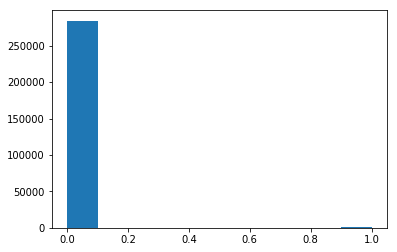

In [10]:
y=df.pop('Class')
X=df
print('Is ther any Null value?',df.isnull().any().any())# How many NaNs?
print('Number of Fraud is',y.sum(),"which is",round(y.mean()*100,2),"% of total counts")


plt.hist(y)
plt.show()

# Oversampling

Based on https://beckernick.github.io/oversampling-modeling/

In [11]:
training_features, test_features,training_target, test_target, =  train_test_split(X, y,test_size = 0.1,random_state=12)
                                               
                                               
                                               

In [12]:
x_train, x_val, y_train, y_val = train_test_split(training_features, training_target,
                                                  test_size = 0.1,
                                                  random_state=12)



## SMOTE Algorithm

In [13]:

sm = SMOTE(random_state=12)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)


# Classification

In [14]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV

In [15]:
pipe = Pipeline([
    ('RandomForest',RandomForestClassifier(n_jobs=-1))])
    
param_grid = {'RandomForest__n_estimators':[10,25,35],
              "RandomForest__max_depth":[5,7,10,14],
                "RandomForest__min_samples_leaf":[5,10]
               
               
             }

clf_rf = GridSearchCV(pipe,param_grid)


clf_rf.fit(x_train_res,y_train_res)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('RandomForest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'RandomForest__n_estimators': [10, 25, 35], 'RandomForest__max_depth': [5, 7, 10, 14], 'RandomForest__min_samples_leaf': [5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [16]:
print(clf_rf.best_estimator_)

Pipeline(memory=None,
     steps=[('RandomForest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])


# Plot confusion matrix

Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

In [17]:


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the training dataset:  0.877551020408
Recall metric in the testing dataset:  0.844444444444
Confusion matrix, without normalization
[[28425    11]
 [    7    38]]


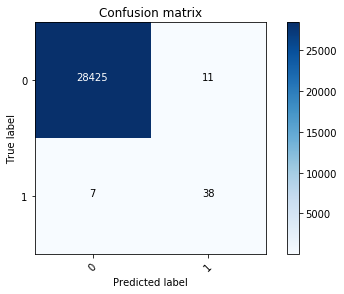

In [18]:
from sklearn.metrics import confusion_matrix
import itertools
cnf_matrix = confusion_matrix(test_target,clf_rf.best_estimator_.predict(test_features))
#

print("Recall metric in the training dataset: ",recall_score(y_val, clf_rf.best_estimator_.predict(x_val)))
print ("Recall metric in the testing dataset: ",recall_score(test_target, clf_rf.best_estimator_.predict(test_features)))

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()